# Building Machine Learning Models


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
%matplotlib inline

In [2]:
from sklearn.metrics import classification_report as cr
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score as acs

In [3]:
df = pd.read_csv('Emp_Model2_df.csv')

In [4]:
df.shape

(546221, 46)

### creating a column "attrition_within_a_year" using YearAtCompany column,to see whether an employee get attritioned with in a year or not.

In [5]:
l = []
for i in range(len(df['Attrition'])):
    if df['YearsAtCompany'][i]==1 and df['Attrition'][i]==1:
        l.append(1) 
    else:
        l.append(0)

In [6]:
len(l)

546221

Appending this list "l" to the df as a new column AttritionINAYear

In [7]:
df['AttritionINAYear'] = l

In [8]:
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Department_Software,Department_Support,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,AttritionINAYear
0,58,0,200,13,5,1,33,4,5,4,17288,6,34,2,2,4,40,3,4,31,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
1,35,0,711,28,4,3,90,1,5,1,41000,6,47,4,4,3,1,1,4,1,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0
2,37,0,1077,16,5,3,142,2,3,2,28591,3,22,3,3,2,6,1,1,3,3,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,34,1,1199,10,2,2,197,2,1,4,22968,2,2,1,4,1,7,4,3,6,5,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,48,0,184,34,3,3,123,1,3,1,16527,1,14,2,4,2,17,6,2,11,6,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546216,20,0,1472,41,3,1,200,3,4,4,4627,8,11,1,1,1,2,4,2,1,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
546217,60,1,1290,9,5,3,176,4,3,1,25823,0,16,3,1,1,31,3,1,17,17,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
546218,51,0,1265,50,3,4,154,2,3,1,12158,0,2,3,3,4,15,2,2,12,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
546219,55,0,1298,33,5,1,142,1,3,3,19790,5,26,3,4,1,29,4,4,28,16,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [9]:
df.drop('Attrition',axis=1,inplace = True)

In [10]:
df[df['AttritionINAYear']==1]

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Department_Software,Department_Support,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,AttritionINAYear
8,54,693,29,4,2,105,4,5,3,16467,3,20,3,1,3,13,2,3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1
15,20,715,13,4,1,134,2,3,1,33793,8,5,3,1,2,1,6,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1
23,34,1397,48,4,3,63,2,4,4,39555,8,49,4,4,2,1,2,3,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1
32,44,306,30,3,4,143,4,2,1,27823,5,46,3,4,2,1,4,4,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
34,25,339,8,5,4,138,4,3,1,45823,1,10,1,3,4,2,3,4,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546152,58,1103,12,4,2,146,1,2,4,5984,0,29,2,4,1,4,3,2,1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1
546156,54,158,40,1,4,118,1,3,2,11294,6,0,3,4,3,4,4,4,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
546166,48,1322,14,3,2,100,2,3,3,49953,2,48,4,3,2,16,2,3,1,1,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1
546170,23,1262,31,2,4,74,4,4,4,13521,4,4,2,4,4,4,5,3,1,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1


In [10]:
df['AttritionINAYear'].value_counts()

0    503279
1     42942
Name: AttritionINAYear, dtype: int64

### Spliting the data for trianing and testing.


In [11]:
x = df.drop('AttritionINAYear',axis=1)
y = df["AttritionINAYear"]

### Handling Imbalanced Dataset

### Using Over Sampling Technique


In [12]:
from imblearn.over_sampling import SMOTE 
sm=SMOTE(random_state=2)
x_res,y_res=sm.fit_resample(x,y.ravel())

In [13]:
x_res.shape,y_res.shape

((1006558, 45), (1006558,))

In [14]:
from sklearn.model_selection import train_test_split
x2_train,x2_test,y2_train,y2_test = train_test_split(x_res,y_res,test_size = 0.3,random_state = 200)

## Logistic Regression


In [15]:
from sklearn.linear_model import LogisticRegression as lg
lr = lg().fit(x2_train,y2_train)
p1 = lr.predict(x2_test)

In [16]:
print("Training Accuracy:",lr.score(x2_train,y2_train))
print("------------------------------------------------------------")
print("Accuracy:",acs(y2_test,p1))
print("-----------------------------------------------------------")
print("confusion_matrix:\n",cm(y2_test,p1))
print("-----------------------------------------------------------")
print("classifiction_report:\n",cr(y2_test,p1))

Training Accuracy: 0.8118366709717708
------------------------------------------------------------
Accuracy: 0.8118972871297621
-----------------------------------------------------------
confusion_matrix:
 [[112506  38447]
 [ 18354 132661]]
-----------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

           0       0.86      0.75      0.80    150953
           1       0.78      0.88      0.82    151015

    accuracy                           0.81    301968
   macro avg       0.82      0.81      0.81    301968
weighted avg       0.82      0.81      0.81    301968



## Decision Tree


In [17]:
from sklearn.tree import DecisionTreeClassifier as dtc
dt = dtc().fit(x2_train,y2_train)
p2 = dt.predict(x2_test)

In [18]:
print("Training Accuracy:",dt.score(x2_train,y2_train))
print("------------------------------------------------------------")
print("Accuracy:",acs(y2_test,p2))
print("-----------------------------------------------------------")
print("confusion_matrix:\n",cm(y2_test,p2))
print("-----------------------------------------------------------")
print("classifiction_report:\n",cr(y2_test,p2))

Training Accuracy: 1.0
------------------------------------------------------------
Accuracy: 0.9558065755311821
-----------------------------------------------------------
confusion_matrix:
 [[144038   6915]
 [  6430 144585]]
-----------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96    150953
           1       0.95      0.96      0.96    151015

    accuracy                           0.96    301968
   macro avg       0.96      0.96      0.96    301968
weighted avg       0.96      0.96      0.96    301968



## Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier as rfc
random_forest = rfc().fit(x2_train,y2_train)
p3 = random_forest.predict(x2_test)

In [16]:
print("Training Accuracy:",random_forest.score(x2_train,y2_train))
print("-----------------------------------------------------------")
print("Testing Accuracy:",acs(y2_test,p3))
print("-----------------------------------------------------------")
print("confusion_matrix:\n",cm(y2_test,p3))
print("-----------------------------------------------------------")
print("classifiction_report:\n",cr(y2_test,p3))

Training Accuracy: 1.0
-----------------------------------------------------------
Testing Accuracy: 0.9584095003444073
-----------------------------------------------------------
confusion_matrix:
 [[141599   9354]
 [  3205 147810]]
-----------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96    150953
           1       0.94      0.98      0.96    151015

    accuracy                           0.96    301968
   macro avg       0.96      0.96      0.96    301968
weighted avg       0.96      0.96      0.96    301968



In [21]:
random_forest.feature_importances_

array([0.01289473, 0.00828621, 0.00786534, 0.0068522 , 0.01096835,
       0.00797775, 0.01084818, 0.00879707, 0.00903017, 0.00838298,
       0.0061556 , 0.00792673, 0.00938855, 0.01226074, 0.00745161,
       0.08578309, 0.0059163 , 0.00883901, 0.43683245, 0.18762888,
       0.01339862, 0.01522927, 0.00459519, 0.00517486, 0.00481988,
       0.00473094, 0.00454368, 0.00462094, 0.0037886 , 0.00473687,
       0.00533061, 0.00488016, 0.00788356, 0.00219807, 0.00195266,
       0.0018309 , 0.00199622, 0.00219981, 0.00182176, 0.00182782,
       0.00189511, 0.00193863, 0.01696625, 0.01538688, 0.0061668 ])

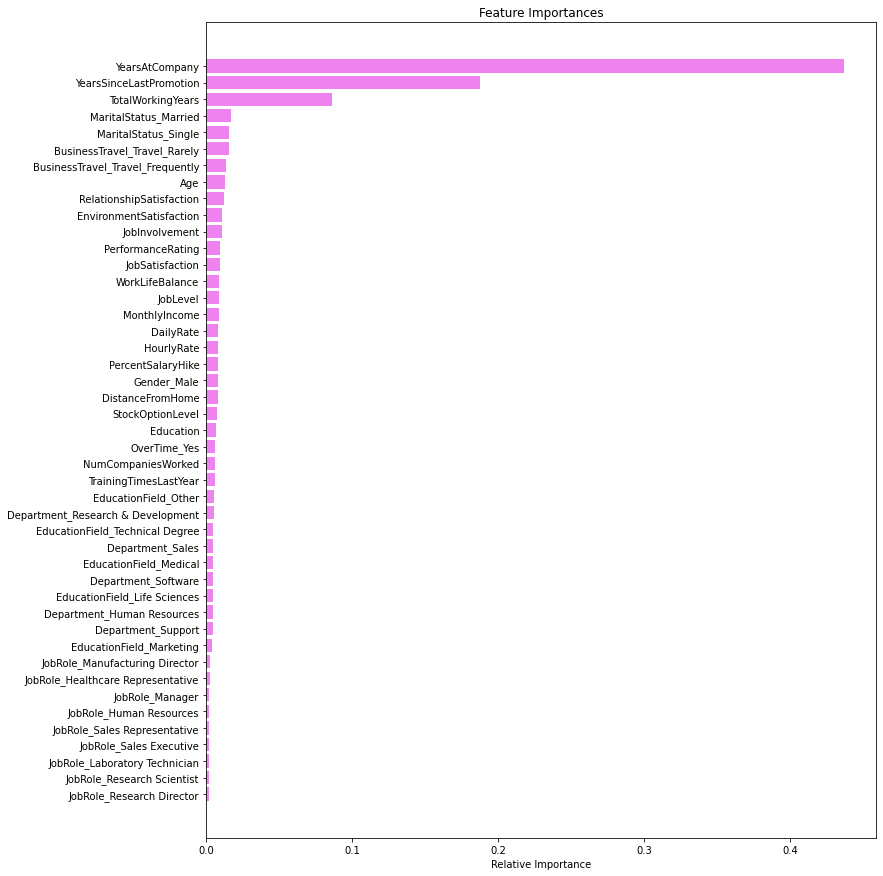

In [24]:
feature_names = list(x2_train.columns)
importances = random_forest.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12, 15))
plt.title("Feature Importances")
plt.barh(range(len(indices)),importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### By seeing the above plot we have selected some important features as listed below.

In [25]:
col=(['YearsAtCompany','YearsSinceLastPromotion','TotalWorkingYears','BusinessTravel_Travel_Rarely','Age','MaritalStatus_Single',
      'MaritalStatus_Married','BusinessTravel_Travel_Frequently','EnvironmentSatisfaction','JobSatisfaction','JobInvolvement','JobLevel',
      'DistanceFromHome','MonthlyIncome','DailyRate','PercentSalaryHike','OverTime_Yes','NumCompaniesWorked',
     'Gender_Male','Education'])

In [26]:
df_train=x2_train[col]
df_test=x2_test[col]

## Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(x2_train,y2_train)
p1 = lr.predict(x2_test)

In [30]:
print("Training Accuracy:",lr.score(x2_train,y2_train))
print("------------------------------------------------------------")
print("Accuracy:",acs(y2_test,p1))
print("-----------------------------------------------------------")
print("confusion_matrix:\n",cm(y2_test,p1))
print("-----------------------------------------------------------")
print("classifiction_report:\n",cr(y2_test,p1))

Training Accuracy: 0.8118366709717708
------------------------------------------------------------
Accuracy: 0.8118972871297621
-----------------------------------------------------------
confusion_matrix:
 [[112506  38447]
 [ 18354 132661]]
-----------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

           0       0.86      0.75      0.80    150953
           1       0.78      0.88      0.82    151015

    accuracy                           0.81    301968
   macro avg       0.82      0.81      0.81    301968
weighted avg       0.82      0.81      0.81    301968



## Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier as dtc
dt = dtc().fit(x2_train,y2_train)
p2 = dt.predict(x2_test)

In [32]:
print("Training Accuracy:",dt.score(x2_train,y2_train))
print("------------------------------------------------------------")
print("Accuracy:",acs(y2_test,p2))
print("-----------------------------------------------------------")
print("confusion_matrix:\n",cm(y2_test,p2))
print("-----------------------------------------------------------")
print("classifiction_report:\n",cr(y2_test,p2))

Training Accuracy: 1.0
------------------------------------------------------------
Accuracy: 0.955829756795422
-----------------------------------------------------------
confusion_matrix:
 [[144006   6947]
 [  6391 144624]]
-----------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96    150953
           1       0.95      0.96      0.96    151015

    accuracy                           0.96    301968
   macro avg       0.96      0.96      0.96    301968
weighted avg       0.96      0.96      0.96    301968



## Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier as rfc
random_forest = rfc().fit(x2_train,y2_train)
p3 = random_forest.predict(x2_test)

In [34]:
print("Training Accuracy:",random_forest.score(x2_train,y2_train))
print("------------------------------------------------------------")
print("Accuracy:",acs(y2_test,p2))
print("-----------------------------------------------------------")
print("confusion_matrix:\n",cm(y2_test,p2))
print("-----------------------------------------------------------")
print("classifiction_report:\n",cr(y2_test,p2))

Training Accuracy: 1.0
------------------------------------------------------------
Accuracy: 0.955829756795422
-----------------------------------------------------------
confusion_matrix:
 [[144006   6947]
 [  6391 144624]]
-----------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96    150953
           1       0.95      0.96      0.96    151015

    accuracy                           0.96    301968
   macro avg       0.96      0.96      0.96    301968
weighted avg       0.96      0.96      0.96    301968



## Gaussian Naive Bayes classifier

In [35]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x2_train, y2_train)
p5 = gnb.predict(x2_test)

In [37]:
print("Training Accuracy:",gnb.score(x2_train,y2_train))
print("-----------------------------------------------------------")
print("Accuracy:",acs(y2_test,p5))
print("-----------------------------------------------------------")
print("confusion_matrix:\n",cm(y2_test,p5))
print("-----------------------------------------------------------")
print("classifiction_report:\n",cr(y2_test,p5))

Training Accuracy: 0.9038121460707645
-----------------------------------------------------------
Accuracy: 0.9035361362793408
-----------------------------------------------------------
confusion_matrix:
 [[122293  28660]
 [   469 150546]]
-----------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

           0       1.00      0.81      0.89    150953
           1       0.84      1.00      0.91    151015

    accuracy                           0.90    301968
   macro avg       0.92      0.90      0.90    301968
weighted avg       0.92      0.90      0.90    301968



## XGBoost

In [38]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x2_train,y2_train)
p6 = xgb_classifier.predict(x2_test)

[21:39:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [39]:
print("Training Accuracy:",xgb_classifier.score(x2_train,y2_train))
print("-----------------------------------------------------------")
print("Accuracy:",acs(y2_test,p6))
print("-----------------------------------------------------------")
print("confusion_matrix:\n",cm(y2_test,p6))
print("-----------------------------------------------------------")
print("classifiction_report:\n",cr(y2_test,p6))

Training Accuracy: 0.9676521097375779
-----------------------------------------------------------
Accuracy: 0.9574160175912679
-----------------------------------------------------------
confusion_matrix:
 [[143595   7358]
 [  5501 145514]]
-----------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96    150953
           1       0.95      0.96      0.96    151015

    accuracy                           0.96    301968
   macro avg       0.96      0.96      0.96    301968
weighted avg       0.96      0.96      0.96    301968



## Gradient Boosting Classifier


In [40]:
from sklearn.ensemble import GradientBoostingClassifier as gbc
gb=gbc().fit(x2_train,y2_train)
p7=gb.predict(x2_test)

In [41]:
print("Training Accuracy:",gb.score(x2_train,y2_train))
print("-----------------------------------------------------------")
print("Accuracy:",acs(y2_test,p7))
print("-----------------------------------------------------------")
print("confusion_matrix:\n",cm(y2_test,p7))
print("-----------------------------------------------------------")
print("classifiction_report:\n",cr(y2_test,p7))

Training Accuracy: 0.9577328659220256
-----------------------------------------------------------
Accuracy: 0.9570086896624808
-----------------------------------------------------------
confusion_matrix:
 [[140475  10478]
 [  2504 148511]]
-----------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.96    150953
           1       0.93      0.98      0.96    151015

    accuracy                           0.96    301968
   macro avg       0.96      0.96      0.96    301968
weighted avg       0.96      0.96      0.96    301968



## Lightgbm

In [42]:
%%time
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(boosting_type='gbdt',
    num_leaves=5000,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=5000,
    subsample_for_bin=200000,
    objective='binary',
    
    min_child_samples=5000,

    reg_alpha=0.9,
    reg_lambda=0.9,
metric='binary_logloss', #metric for binary classification
    
    n_jobs=-1,
    silent=True,
    importance_type='',
    random_state=6)

lgbm.fit(x2_train, y2_train),
p8 = lgbm.predict(x2_test)

CPU times: total: 40min 4s
Wall time: 51min 57s


In [ ]:
print("Training Accuracy:",lgbm.score(x2_train,y2_train))
print("-----------------------------------------------------------")
print("Accuracy:",acs(y2_test,p8))
print("-----------------------------------------------------------")
print("confusion_matrix:\n",cm(y2_test,p8))
print("-----------------------------------------------------------")
print("classifiction_report:\n",cr(y2_test,p8))

## Catboost

In [43]:
from catboost import CatBoostClassifier

clf1 = CatBoostClassifier(
    iterations=30000, 
    learning_rate=0.1, 
    #loss_function='CrossEntropy'
)


clf1.fit(x2_train, y2_train, 
     
        eval_set=(x2_test, y2_test), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf1.is_fitted()))
print('CatBoost model parameters:')
print(clf1.get_params())
p9=clf1.predict(x2_test)

CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 30000, 'learning_rate': 0.1}


In [44]:
print("Training Accuracy:",clf1.score(x2_train,y2_train))
print("-----------------------------------------------------------")
print("Accuracy:",acs(y2_test,p9))
print("-----------------------------------------------------------")
print("confusion_matrix:\n",cm(y2_test,p9))
print("-----------------------------------------------------------")
print("classifiction_report:\n",cr(y2_test,p9))

Training Accuracy: 0.9817667012021175
-----------------------------------------------------------
Accuracy: 0.9588234514915488
-----------------------------------------------------------
confusion_matrix:
 [[144023   6930]
 [  5504 145511]]
-----------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96    150953
           1       0.95      0.96      0.96    151015

    accuracy                           0.96    301968
   macro avg       0.96      0.96      0.96    301968
weighted avg       0.96      0.96      0.96    301968



### As Random forest classifier got the better accuracy so we are using this model for deployement.

In [24]:
import pickle
pickle_out = open('random_forest.pkl',"wb")
pickle.dump(random_forest,pickle_out)
pickle_out.close()

## Performance measurement of models using roc curve

In [47]:
from sklearn.metrics import roc_curve
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y2_test, p1[:,], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y2_test, p2[:,], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y2_test, p5[:,], pos_label=1)
fpr4, tpr4, thresh3 = roc_curve(y2_test, p6[:,], pos_label=1)
fpr5, tpr5, thresh3 = roc_curve(y2_test, p8[:,], pos_label=1)
# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y2_test))]
p_fpr, p_tpr, _ = roc_curve(y2_test, random_probs, pos_label=1)

In [48]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y2_test, p1[:,])
auc_score2 = roc_auc_score(y2_test, p2[:,])
auc_score3 = roc_auc_score(y2_test, p5[:,])
auc_score4 = roc_auc_score(y2_test, p6[:,])
auc_score5 = roc_auc_score(y2_test, p8[:,])

print(auc_score1, auc_score2,auc_score3,auc_score4,auc_score5)

0.8118836171885534 0.9558293768873659 0.9035169640563914 0.9574147531496259 0.958901818719084


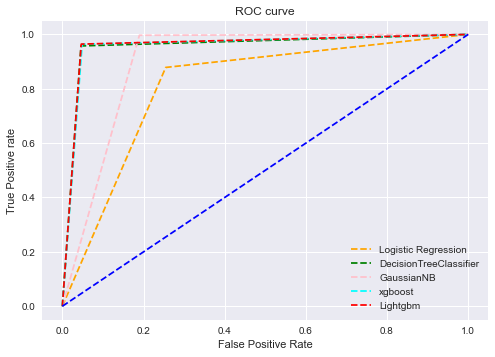

In [49]:
#matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='DecisionTreeClassifier')
plt.plot(fpr3, tpr3, linestyle='--',color='pink', label='GaussianNB')
plt.plot(fpr4, tpr4, linestyle='--',color='cyan', label='xgboost')
plt.plot(fpr5, tpr5, linestyle='--',color='red', label='Lightgbm')


plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();